# Project 

## 1.Title of the Project:
Machine Predictive Maintenance Classification: To predict Machine failure (binary) and failure type (multiclass)

 ## 2. Brief on the Project:
 Predictive maintenance techniques are designed to help anticipate equipment failures to allow for advance scheduling of corrective maintenance, thereby preventing unexpected equipment downtime, improving service quality for customers, and also reducing the additional cost caused by over-maintenance in preventative maintenance policies. System failure is common across all use cases of machines and equipment. But for a certain context, it is crucial to predict the failure in time and, accordingly, take preventive measures to avoid such failure. Fortunately, we now have machine learning technology at our disposal to make precise predictions of system failure that can easily be prevented. By assessing the working of certain parts and equipment within a machine, maintenance work can be scheduled, and the entire system can be prevented from breaking down. Such predictive maintenance can prevent car breakdowns, aviation accidents, and failure of mission-critical systems exposing people and resources to risks.
Predictive maintenance by using Machine Learning tries to learn from historical data and use live data to detect the patterns of system failure. In contrast to traditional maintenance procedures relying on the life cycle of machine parts, the ML-based predictive approach prevents loss of resources and under-optimized utilization of resources for maintenance tasks. Predicting failure at the right time ML technology helps mitigate the fault lines in time while not draining resources. This ensures establishing the right balance between maintenance needs and resource utilization.

## 3.  Steps for project completion:
    a. Collecting & analyzing the data
    b. Feature selection and feature engineering
    c. Outlier detection and treatment
    d. Missing value detection and treatment
    e. Model building 
    f. Checking training and testing accuracy
    Models used are Logistics regression, Decision tree, Random forest, K-Nearest Neighbor, Gradient Boosting, ADA Boost, XG Boost
    g. Accuracy score will be compared to select the best model

## Data Collection:
    When collecting data to support a failure model, it is important to make an inventory the following: 
    (i) What are the types of failure that can occur? Which ones will we try to predict? 
    (ii) How does the “failure process” look like? Is it a slow degradation process or an acute one? 
    (iii) Which parts of the machine/system could be related to each type of failure? What can be measured about each of them that reflect their state? How often and with which accuracy do these measurements need to be performed?

## Problem Framing:
    When thinking about how to frame a predictive maintenance model, it is important to keep a couple of questions in mind: 
    (i) What kind of output should the model give? 
    (ii) Is enough historical data available or just static data? 
    (iii) Is every recorded event labelled, i.e. which measurements correspond to good functioning and which ones correspond to failure? Or at least, is it known when each machine failed (if at all)? 
    (iv) When labelled events are available, what is the proportion of the number of events of each type of failure and events of well functioning? 
    (v) How long in advance should the model be able to indicate that a failure will occur? 
    (vi) What are the performance targets that the model should be optimized for? High precision, high sensitivity/recall, high accuracy? What is the consequence of not predicting a failure or predicting a failure that will not happen?

## 4.Resources:
### Data source- https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

### Software: Jupyter Notebook used for data analysis and model building

## Individual Details:
 Name: Vidit Kumar Pal, Email: vidit.20.pal@gmail.com, Contact: +91-7985431988

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle

In [2]:
pm=pd.read_csv('predictive_maintenance.csv')
pm

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
#analysing the data
pm.shape

(10000, 10)

In [4]:
pm.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
pm.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [6]:
pm.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [7]:
pm.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [8]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [9]:
#checking for null values
pm.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [10]:
pm.nunique


<bound method DataFrame.nunique of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm

After analyzing the data, the observations are:

    1. There are 10000 rows and 10 columns
    
    2. there are no missing values
    
    3. UDI & Product ID are just for identification, hence can be dropped.
    
    4. Target variables are 0 and 1
    
    5. there are two target variable: "Target" and "Failure Type"

In [11]:
pm.drop(['UDI','Product ID'],axis=1, inplace=True)
pm

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [12]:
#Analysis of numerical data
pm.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [13]:
for i in pm[['Type','Target','Failure Type']]:
    print(pm[i].value_counts())
    print('\n')

L    6000
M    2997
H    1003
Name: Type, dtype: int64


0    9661
1     339
Name: Target, dtype: int64


No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64




From the above analysis, it can be inferred that:
1. data is highly imbalanced
2. target variable have total six categories: no failure and five other types of failures

# EDA PART

In [14]:
#counting types of failures
pm.groupby(['Target','Failure Type']).count().drop(['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
                                                    'Torque [Nm]','Tool wear [min]'], axis=1).rename(columns={'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

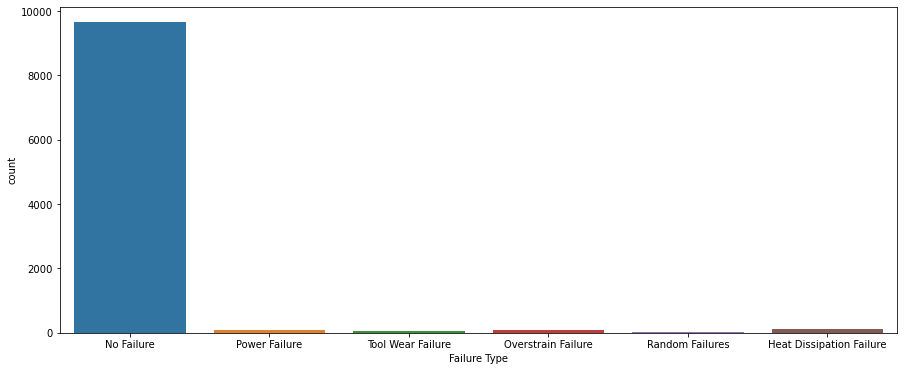

In [15]:
plt.figure(figsize=[15,6])
sns.countplot(pm[i])

<AxesSubplot:xlabel='Target', ylabel='count'>

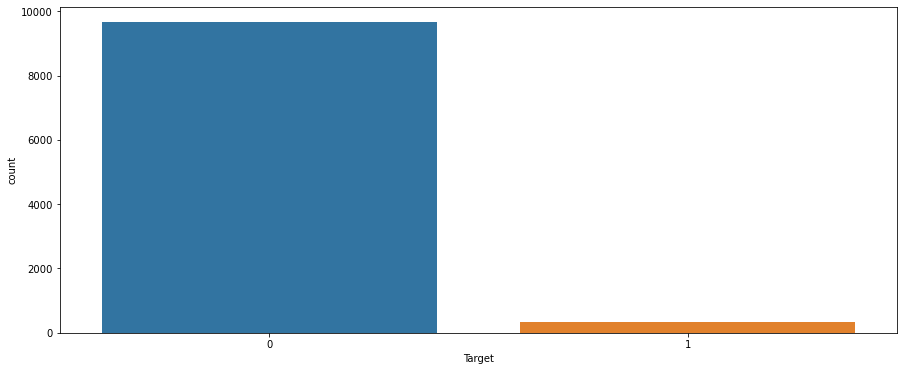

In [16]:
plt.figure(figsize=[15,6])
sns.countplot(data=pm, x='Target')

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

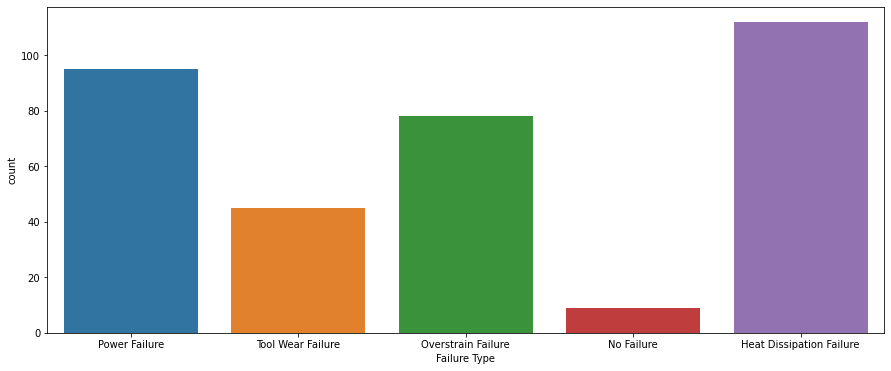

In [17]:
plt.figure(figsize=[15,6])
sns.countplot(data=pm[pm['Target']==1], x="Failure Type")

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

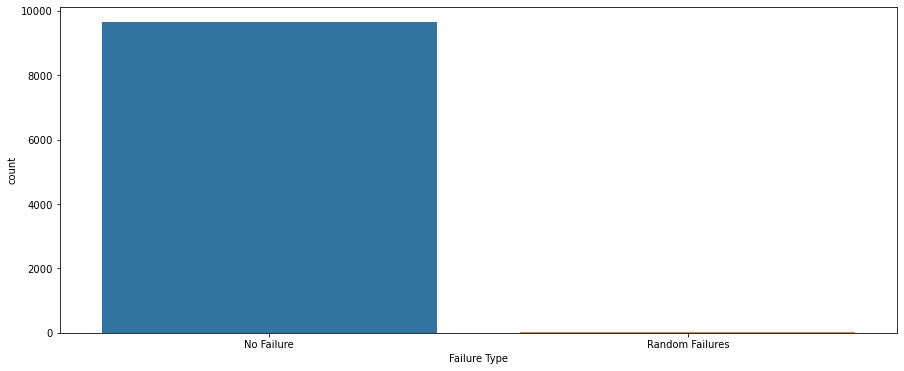

In [18]:
plt.figure(figsize=[15,6])
sns.countplot(data=pm[pm["Target"]==0], x="Failure Type")

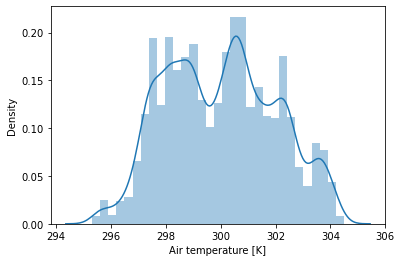

<Figure size 720x720 with 0 Axes>

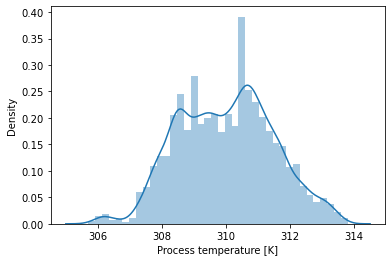

<Figure size 720x720 with 0 Axes>

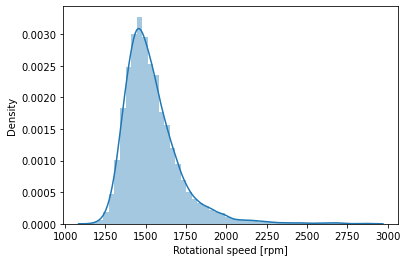

<Figure size 720x720 with 0 Axes>

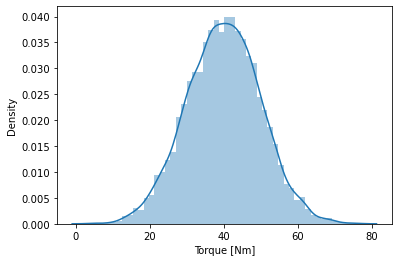

<Figure size 720x720 with 0 Axes>

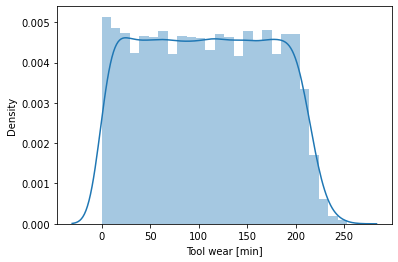

<Figure size 720x720 with 0 Axes>

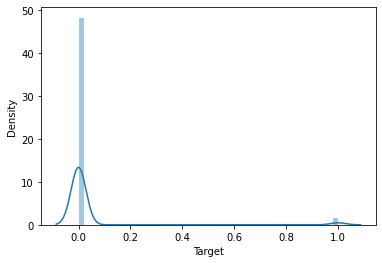

<Figure size 720x720 with 0 Axes>

In [19]:
#checking the quality of the data
for i in ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']:
    sns.distplot(pm[i])
    fig=plt.figure(figsize=(10,10))
    plt.show()

In [20]:
#checking correlation
pm.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


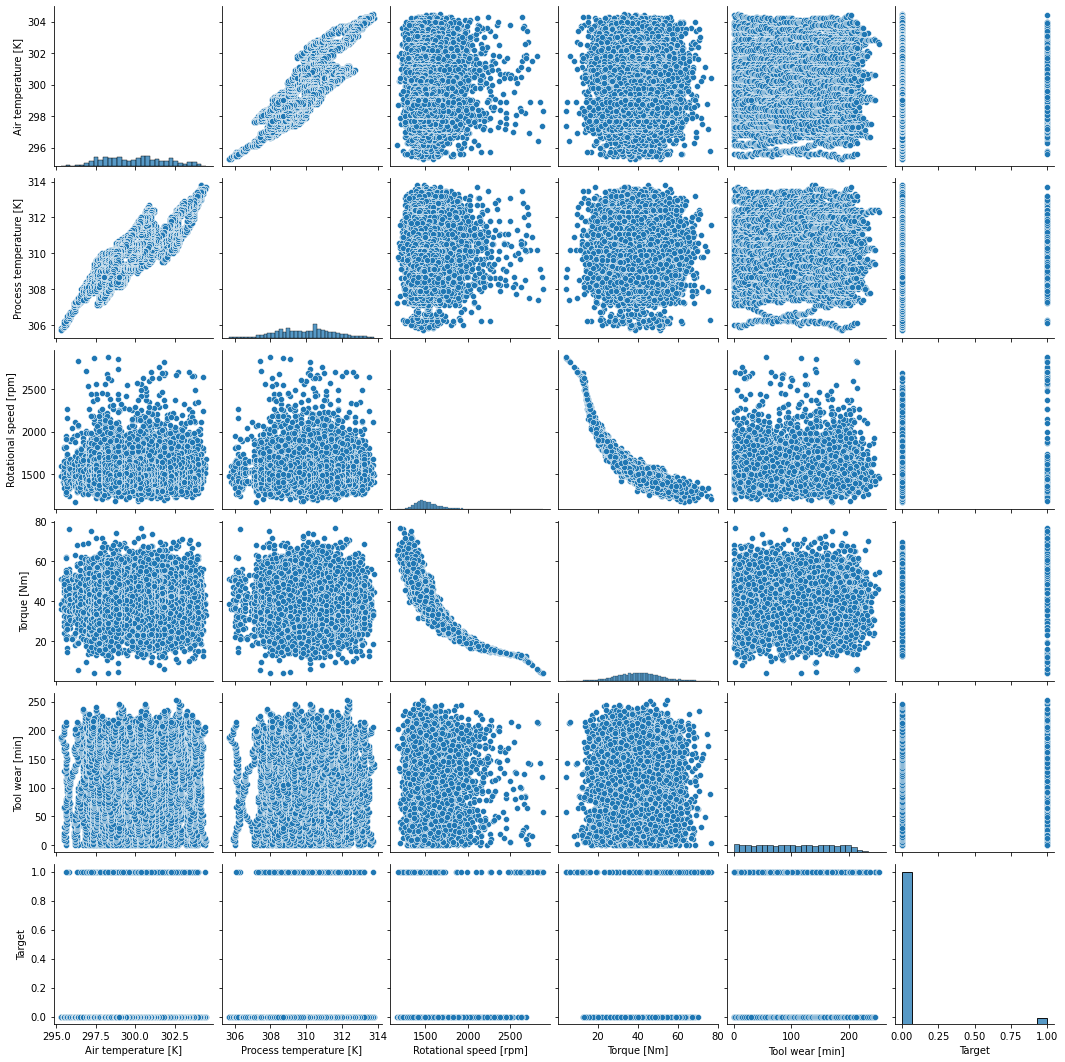

In [21]:
sns.pairplot(pm)

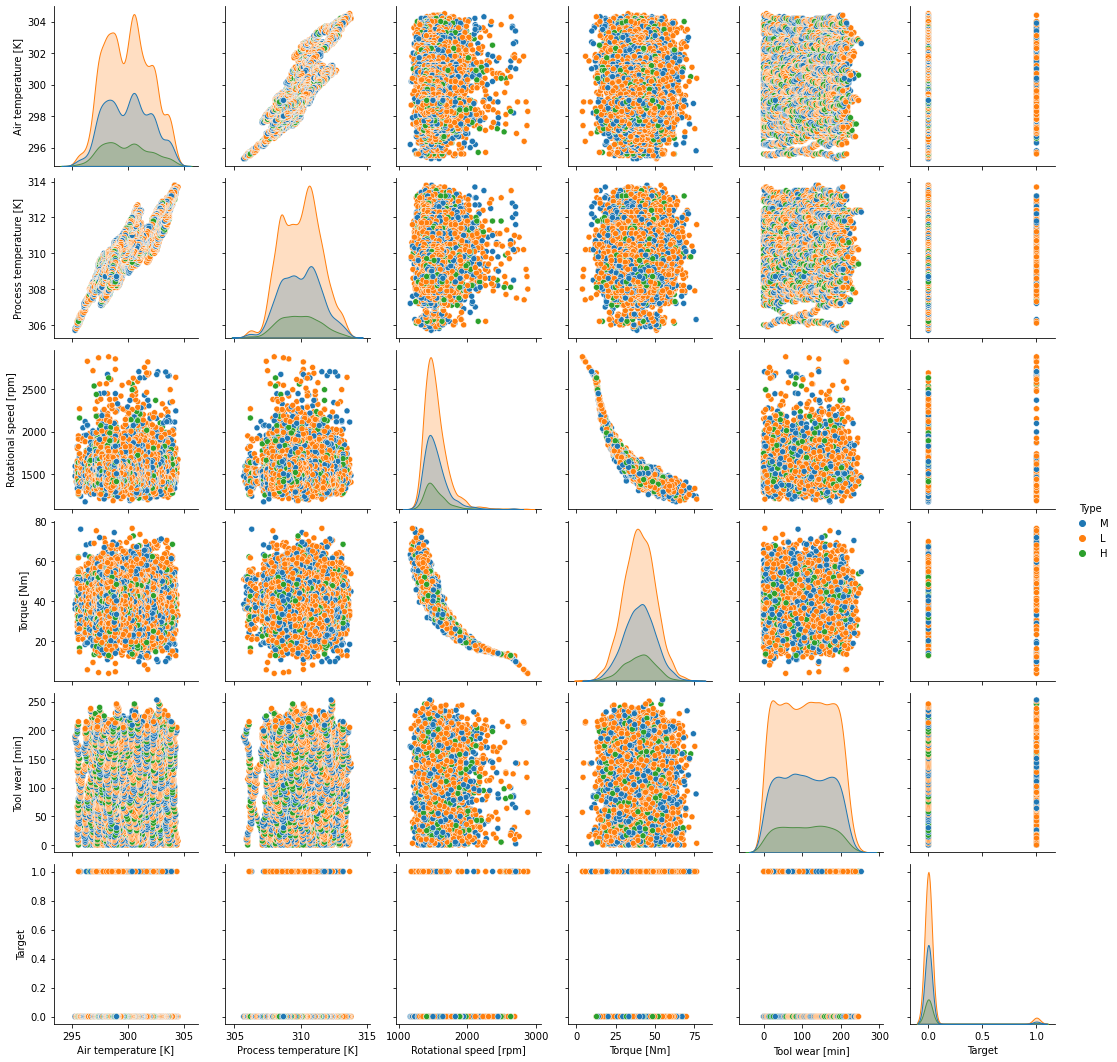

In [22]:
#pairplot w.r.t dependent variable "Type"
sns.pairplot(pm, hue="Type")

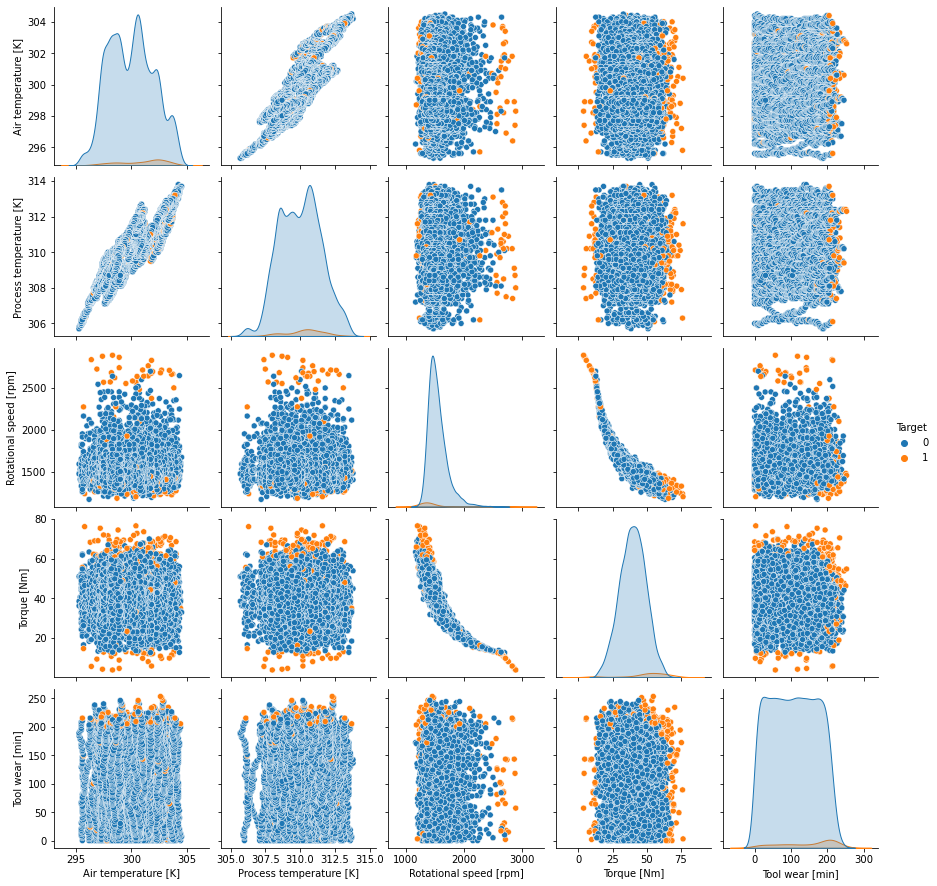

In [23]:
#pairplot w.r.t dependent variable "Target"
sns.pairplot(pm, hue="Target")

<AxesSubplot:>

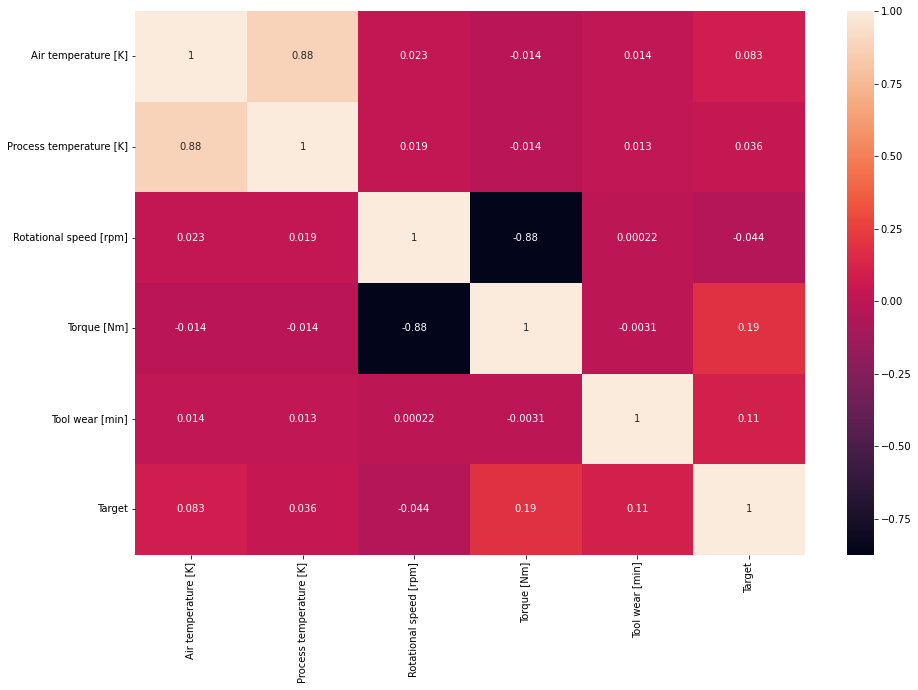

In [24]:
#checking correlation with numerical values
plt.figure(figsize=[15,10])
sns.heatmap(pm.corr(), annot=True)

Rotational Speed is positively skewed. There is high correlation between process temperature and air temperature, and between rotational speed and torque. There is no multi- collinearity observed between variables.

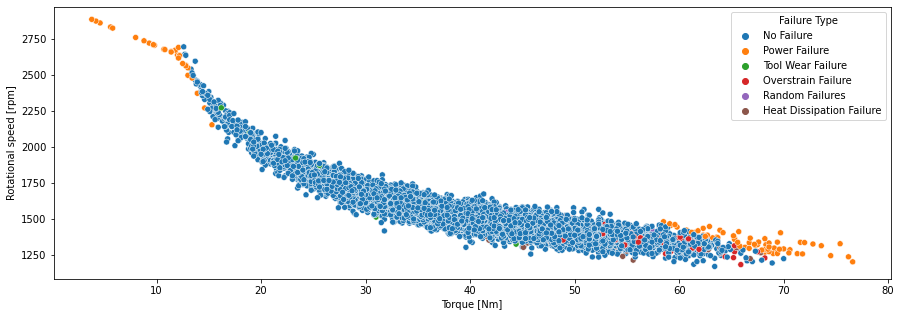

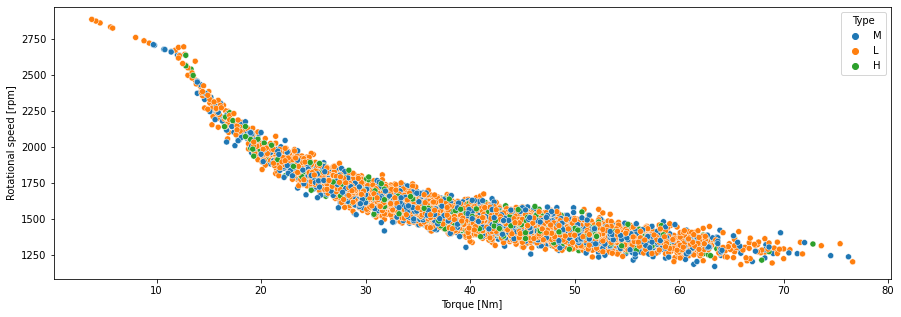

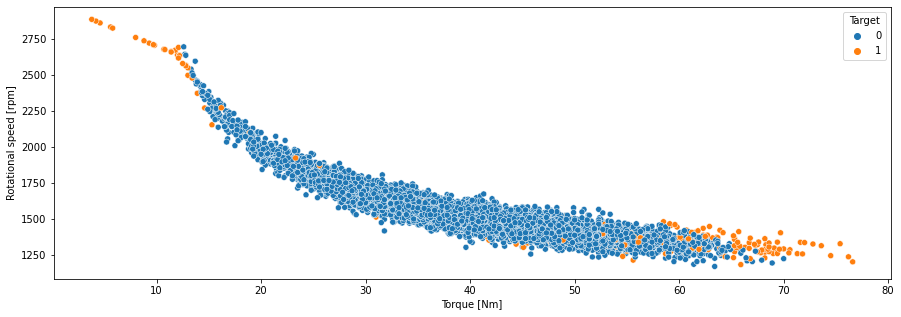

In [25]:
#checking relation between 'Torque' and 'Rotational Speed'
for i in ['Failure Type','Type','Target']:
    plt.figure(figsize=(15,5))
    sns.scatterplot(data=pm, x='Torque [Nm]',y='Rotational speed [rpm]',hue=i, palette='tab10')

(i) Torque and rotational speed are highly correlated.

(ii) Process temperature and air temperature are also highly correlated. 

(iii) We immediately see that failures occur for extreme values of some features, i.e., the machinery fails either for the lowest or largest values of torque and rotational speed. This is easily spotted in the pairplot. Since the orange dots are far apart for those features. So, there is a range for normal conditions in which the machines operate, and above or under this range, they tend to fail.

<AxesSubplot:title={'center':'Rotational Speed vs Torque w.r.t Failure type'}, xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

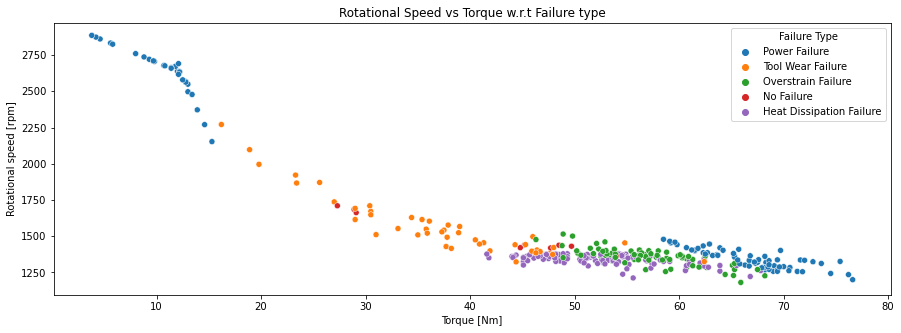

In [26]:
#Checking failure data in relation with "Rotational Speed" and "Torque"
plt.figure(figsize=[15,5])
plt.title('Rotational Speed vs Torque w.r.t Failure type')
sns.scatterplot(data=pm[pm['Target']==1], x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", palette='tab10')

(i) Power failure happens both for lower and higher rotational speed/torque. It is the type of failure with the highest rotational speed (over 2500rpm) and lowest torque (below around 15Nm). 

(ii) Between torques 16Nm and 41Nm all failures are tool wear.

(iii) Overstrain failures take place with torques ranging from around 47 and 68Nm) and rotational speeds from 1200 to 1500rpm approximately.

(iv) For heat dissipation failures, the failure is comparable to overstrain failures.

<AxesSubplot:title={'center':'Air Temperature vs Process temperature w.r.t Failure type'}, xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

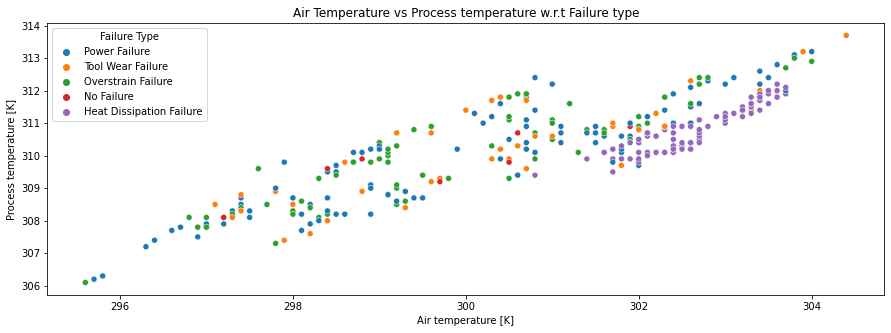

In [27]:
#checking failure data w.r.t "Air Temperture" & "Process Temperature"
plt.figure(figsize=[15,5])
plt.title('Air Temperature vs Process temperature w.r.t Failure type')
sns.scatterplot(data=pm[pm['Target']==1], x="Air temperature [K]", y="Process temperature [K]", hue= "Failure Type", palette='tab10')

(i) Heat Dissipation Failure occurs for Air temperature range around 301.5 K to 303.8 K & Process Temperature range around 309.2 K to 311.8 K 

(ii) Overstrain Failure starts when Air temperature reaches around 296.8 K & Process temperature reaches around 307.2 K

## OUTLIER

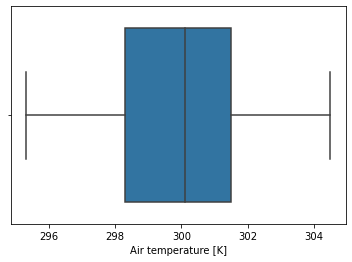

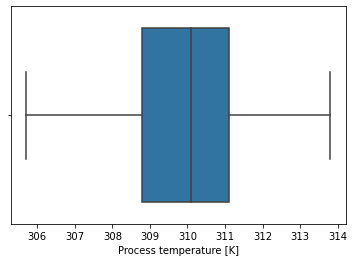

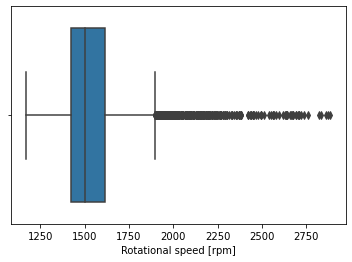

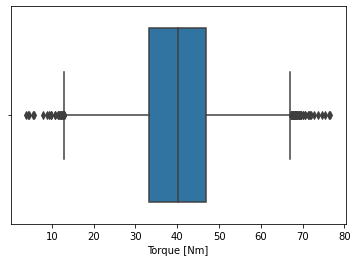

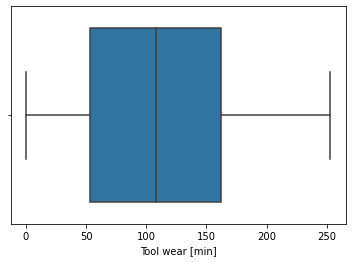

In [28]:
#checking for outliers in the dataset
for i in ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
    sns.boxplot(data=pm, x=i)
    plt.show()

Rotational speed and Torque have outliers in them

In [34]:
def outliertreat(pm):
    sorted(pm)
    Q1,Q3=np.percentile(pm,[25,75])
    IQR= Q3-Q1
    lower_fence= Q1-(1.5*IQR)
    upper_fence= Q3+(1.5*IQR)
    return lower_fence,upper_fence

In [37]:
for i in ['L','M','H']:
    product_type=pm[pm['Type']==i]
    max_rotational_speed, min_rotational_speed= outliertreat(product_type['Rotational speed [rpm]'])
    max_torque,min_torque= outliertreat(product_type['Torque [Nm]'])
    print("values from boxplot for type product"+i+":")
    print(f'maximum torque value:{round(max_torque,2)}')
    print(f'minimum torque value:{round(min_torque,2)}')
    print(f'maximum rotational value:{round(max_rotational_speed,2)}')
    print(f'minimum rotational value:{round(min_rotational_speed,2)}')
    print('\n')

values from boxplot for type productL:
maximum torque value:12.8
minimum torque value:67.2
maximum rotational value:1142.0
minimum rotational value:1894.0


values from boxplot for type productM:
maximum torque value:13.05
minimum torque value:67.05
maximum rotational value:1137.0
minimum rotational value:1897.0


values from boxplot for type productH:
maximum torque value:12.6
minimum torque value:67.0
maximum rotational value:1143.75
minimum rotational value:1893.75




In [46]:
max_rotational_speed,min_rotational_speed=outliertreat(pm['Rotational speed [rpm]'])
max_torque,min_torque=outliertreat(pm['Torque [Nm]'])
#torque values more than boxplot maximum value
max_torque_value=pm[pm["Torque [Nm]"]>=max_torque]['Type'].value_counts()
#torque values less than boxplot minimum value
min_torque_value=pm[pm["Torque [Nm]"]<=min_torque]['Type'].value_counts()
# Rotational speed values more than the boxplot maximum
max_rotational_speed_values=pm[pm['Rotational speed [rpm]']>=max_rotational_speed]['Type'].value_counts()


In [47]:
total_min_max_values= max_torque_value.sum()+min_torque_value.sum()+max_rotational_speed_values.sum()
print("total outliers are:",total_min_max_values)
ratio=total_min_max_values/pm.shape[0]
print(" percentage of values that are outliers:{}".format(ratio))

total outliers are: 29931
 percentage of values that are outliers:2.9931


3% of data are outliers

# Feature Engineering

In [48]:
pm

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(pm['Type'])
pm['Type']=label_encoder.transform(pm['Type'])
label_encoder.fit(pm['Target'])
pm['Target']=label_encoder.transform(pm['Target'])
label_encoder.fit(pm['Failure Type'])
pm['Failure Type']=label_encoder.transform(pm['Failure Type'])

In [50]:
pm.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1


using MinMax scaler to bring down whole data into single scale

In [53]:
pm_scaled=pm.copy()
columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]','Tool wear [min]', 'Torque [Nm]']
scaler=MinMaxScaler()
features_scaled=scaler.fit_transform(pm[columns])
features_scaled=pd.DataFrame(features_scaled,columns=columns)
features_scaled

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],Torque [Nm]
0,0.304348,0.358025,0.222934,0.000000,0.535714
1,0.315217,0.370370,0.139697,0.011858,0.583791
2,0.304348,0.345679,0.192084,0.019763,0.626374
3,0.315217,0.358025,0.154249,0.027668,0.490385
4,0.315217,0.370370,0.139697,0.035573,0.497253
...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.055336,0.353022
9996,0.391304,0.333333,0.270081,0.067194,0.384615
9997,0.402174,0.358025,0.277648,0.086957,0.406593
9998,0.402174,0.370370,0.139697,0.098814,0.614011


In [54]:
pm_scaled.drop(columns,axis=1,inplace=True)
pm_scaled=pd.concat([pm_scaled,features_scaled],axis=1)
pm_scaled

,Type,Target,Failure Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],Torque [Nm]
0,2,0,1,0.304348,0.358025,0.222934,0.000000,0.535714
1,1,0,1,0.315217,0.370370,0.139697,0.011858,0.583791
2,1,0,1,0.304348,0.345679,0.192084,0.019763,0.626374
3,1,0,1,0.315217,0.358025,0.154249,0.027668,0.490385
4,1,0,1,0.315217,0.370370,0.139697,0.035573,0.497253
...,...,...,...,...,...,...,...,...
9995,2,0,1,0.380435,0.333333,0.253783,0.055336,0.353022
9996,0,0,1,0.391304,0.333333,0.270081,0.067194,0.384615
9997,2,0,1,0.402174,0.358025,0.277648,0.086957,0.406593
9998,0,0,1,0.402174,0.370370,0.139697,0.098814,0.614011


Model Building using Dependent Variable "Target"

In [55]:
x_train,x_test,y_train,y_test=train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),pm_scaled['Target'],
                                               test_size=0.3, random_state=1)

# 1.Logistic Regression

In [56]:
#using dependent variable as "Target"

In [57]:
#Logistic regression model building
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [58]:
predictions=logmodel.predict(x_test)

In [59]:
confusion_matrix(y_test,predictions)

array([[2897,    0],
       [ 102,    1]], dtype=int64)

In [60]:
accuracy_score(y_test,predictions)

0.966

In [61]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2897
           1       1.00      0.01      0.02       103

    accuracy                           0.97      3000
   macro avg       0.98      0.50      0.50      3000
weighted avg       0.97      0.97      0.95      3000



# 2.Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score,roc_curve
from pandas_profiling import ProfileReport

In [63]:
x_train,x_test,y_train,y_test=train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),pm_scaled['Target'],
                                               test_size=0.3,random_state=1)

In [64]:
dt_model1=DecisionTreeClassifier()
dt_model1.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5879648569467906, 0.9736842105263158, 'X[5] <= 0.804\ngini = 0.065\nsamples = 7000\nvalue = [6764, 236]'),
 Text(0.21647025443412163, 0.9210526315789473, 'X[5] <= 0.128\ngini = 0.053\nsamples = 6923\nvalue = [6736, 187]'),
 Text(0.02702702702702703, 0.868421052631579, 'X[1] <= 0.951\ngini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(0.02027027027027027, 0.8157894736842105, 'X[4] <= 0.055\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.013513513513513514, 0.7631578947368421, 'X[2] <= 0.728\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.006756756756756757, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.02027027027027027, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02702702702702703, 0.7631578947368421, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.033783783783783786, 0.8157894736842105, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.40591348184121623, 0.868421052631579, 'X[3] <= 0.123\ngini = 0.048\nsa

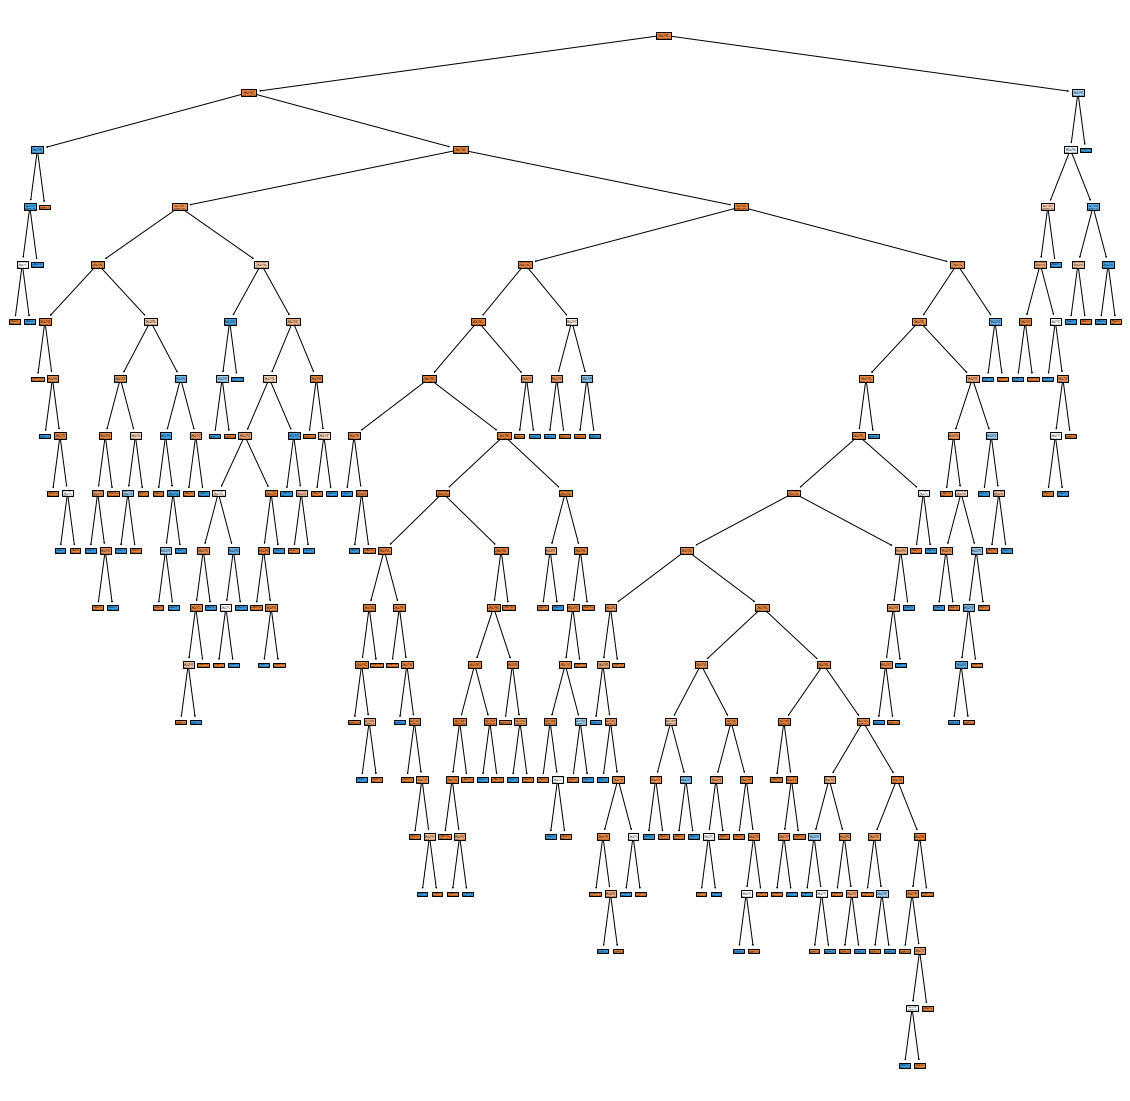

In [65]:
plt.figure(figsize=[20,20])
tree.plot_tree(dt_model1,filled=True)

In [66]:
predictions=dt_model1.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
confusion_matrix(y_test,predictions)

array([[2857,   40],
       [  33,   70]], dtype=int64)

In [68]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2897
           1       0.64      0.68      0.66       103

    accuracy                           0.98      3000
   macro avg       0.81      0.83      0.82      3000
weighted avg       0.98      0.98      0.98      3000



In [69]:
dt_model1.score(x_train,y_train)

1.0

In [70]:
#Model 2
x_train,x_test,y_train,y_test=train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                               pm_scaled['Target'],test_size=0.3,random_state=1)
path=dt_model1.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha=path.ccp_alphas
ccp_alpha

array([0.00000000e+00, 7.00549451e-05, 9.44510035e-05, 9.51199338e-05,
       9.51350237e-05, 9.51352007e-05, 9.52380952e-05, 1.08970100e-04,
       1.25000000e-04, 1.26050420e-04, 1.26628676e-04, 1.26984127e-04,
       1.33928571e-04, 1.35338346e-04, 1.35338346e-04, 1.36054422e-04,
       1.40306122e-04, 1.50841204e-04, 1.53545949e-04, 1.62091503e-04,
       1.70733682e-04, 1.80708181e-04, 1.83458568e-04, 1.90476190e-04,
       1.90476190e-04, 1.90476190e-04, 1.90476190e-04, 2.28571429e-04,
       2.38095238e-04, 2.38095238e-04, 2.38095238e-04, 2.43609023e-04,
       2.43609023e-04, 2.47371676e-04, 2.50000000e-04, 2.54128570e-04,
       2.67857143e-04, 2.68907563e-04, 2.69187675e-04, 2.70676692e-04,
       2.70766201e-04, 2.76346604e-04, 3.20749545e-04, 3.42490842e-04,
       3.42857143e-04, 3.55042017e-04, 3.75835783e-04, 4.62585034e-04,
       5.85281385e-04, 6.05462520e-04, 7.81512421e-04, 8.76911977e-04,
       9.05615162e-04, 1.14026038e-03, 1.36172574e-03, 2.13597770e-03,
      

In [71]:
dt_model2=[]
for ccp in ccp_alpha:
    dt_m2=DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m2.fit(x_train,y_train)
    dt_model2.append(dt_m2)

In [72]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=7.005494505494515e-05),
 DecisionTreeClassifier(ccp_alpha=9.445100354191261e-05),
 DecisionTreeClassifier(ccp_alpha=9.51199338296107e-05),
 DecisionTreeClassifier(ccp_alpha=9.513502370645366e-05),
 DecisionTreeClassifier(ccp_alpha=9.5135200657117e-05),
 DecisionTreeClassifier(ccp_alpha=9.523809523809523e-05),
 DecisionTreeClassifier(ccp_alpha=0.00010897009966777408),
 DecisionTreeClassifier(ccp_alpha=0.000125),
 DecisionTreeClassifier(ccp_alpha=0.0001260504201680672),
 DecisionTreeClassifier(ccp_alpha=0.0001266286763514213),
 DecisionTreeClassifier(ccp_alpha=0.00012698412698412698),
 DecisionTreeClassifier(ccp_alpha=0.00013392857142857144),
 DecisionTreeClassifier(ccp_alpha=0.00013533834586466174),
 DecisionTreeClassifier(ccp_alpha=0.00013533834586466174),
 DecisionTreeClassifier(ccp_alpha=0.00013605442176870753),
 DecisionTreeClassifier(ccp_alpha=0.00014030612244897967),
 DecisionTreeClassifier(ccp_alpha=0.000150841204250293

Text(0, 0.5, 'score')

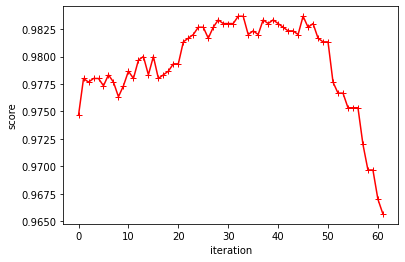

In [73]:
dt_model2=[]
score=[]
for i in ccp_alpha:
    dt_m2=DecisionTreeClassifier(ccp_alpha=i)
    dt_m2.fit(x_train,y_train)
    dt_model2.append(dt_m2)
    score.append(dt_m2.score(x_test,y_test))

plt.plot(score,'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [74]:
train_score=[i.score(x_train,y_train) for i in dt_model2]
test_score=[i.score(x_test,predictions) for i in dt_model2]

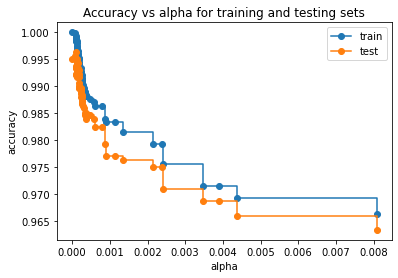

In [75]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [77]:
dt_model_ccp = DecisionTreeClassifier(random_state=0, ccp_alpha=.997)
dt_model_ccp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.997, random_state=0)

[Text(0.5, 0.5, 'gini = 0.065\nsamples = 7000\nvalue = [6764, 236]')]

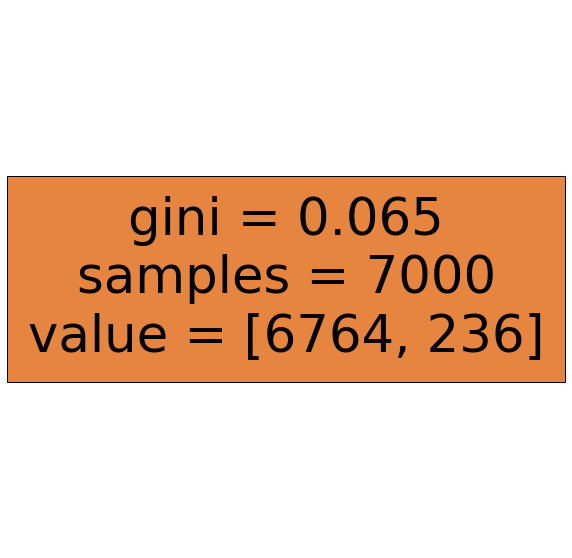

In [78]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt_model_ccp,filled=True)

In [79]:
dt_model_ccp.score(x_train,y_train)

0.9662857142857143

In [81]:
dt_model_ccp.score(x_test,y_test)

0.9656666666666667

In [82]:
predictions=dt_model_ccp.predict(x_test)

In [83]:
confusion_matrix(y_test, predictions)

array([[2897,    0],
       [ 103,    0]], dtype=int64)

In [84]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2897
           1       0.00      0.00      0.00       103

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.93      0.97      0.95      3000



# 3. Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
#setting random seed

In [86]:
x_train,x_test,y_train,y_test=train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                              pm_scaled['Target'],test_size=0.3,random_state=1)

In [88]:
rf_model=RandomForestClassifier(n_jobs=2,random_state=0)

In [89]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [90]:
predictions=rf_model.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
confusion_matrix(y_test,predictions)

array([[2884,   13],
       [  37,   66]], dtype=int64)

In [93]:
report=classification_report(y_test,predictions)

In [94]:
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2897
           1       0.84      0.64      0.73       103

    accuracy                           0.98      3000
   macro avg       0.91      0.82      0.86      3000
weighted avg       0.98      0.98      0.98      3000



In [95]:
rf_model.score(x_train,y_train)

1.0

# 4.K-Nearest Neighbour

In [96]:
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics as sm


In [98]:
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Target'], test_size=0.3, random_state=1)

In [99]:
knn=neighbors.KNeighborsClassifier()

In [100]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [101]:
predictions=knn.predict(x_test)

In [102]:
confusion_matrix(y_test,predictions)

array([[2895,    2],
       [  78,   25]], dtype=int64)

In [103]:
report=classification_report(y_test,predictions)

In [104]:
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2897
           1       0.93      0.24      0.38       103

    accuracy                           0.97      3000
   macro avg       0.95      0.62      0.69      3000
weighted avg       0.97      0.97      0.97      3000



In [105]:
knn.score(x_train,y_train)

0.9758571428571429

# 5.Gaussian Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB


In [107]:
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Target'], test_size=0.3, random_state=1)

In [108]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [109]:
prediction=gnb.predict(x_test)

In [110]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
confusion_matrix(y_test,prediction)

array([[2855,   42],
       [  81,   22]], dtype=int64)

In [112]:
report=classification_report(y_test,prediction)

In [113]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2897
           1       0.34      0.21      0.26       103

    accuracy                           0.96      3000
   macro avg       0.66      0.60      0.62      3000
weighted avg       0.95      0.96      0.95      3000



In [114]:
gnb.score(x_train,y_train)

0.9601428571428572

# 6.ADA Boost

In [115]:
from sklearn.ensemble import AdaBoostClassifier

In [116]:
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Target'], test_size=0.3, random_state=1)

In [117]:
ada=AdaBoostClassifier()
ada.fit(x_test,y_test)

AdaBoostClassifier()

In [118]:
ada_predict=ada.predict(x_test)

In [119]:
confusion_matrix(y_test,ada_predict)

array([[2886,   11],
       [  39,   64]], dtype=int64)

In [120]:
report=classification_report(y_test,ada_predict)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2897
           1       0.85      0.62      0.72       103

    accuracy                           0.98      3000
   macro avg       0.92      0.81      0.86      3000
weighted avg       0.98      0.98      0.98      3000



In [121]:
ada.score(x_test,y_test)

0.9833333333333333

# 7.Gradient Boost

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Target'], test_size=0.3, random_state=1)
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [124]:
gbc_predict=gbc.predict(x_test)

In [125]:
confusion_matrix(y_test,gbc_predict)

array([[2889,    8],
       [  33,   70]], dtype=int64)

In [127]:
report=classification_report(y_test,gbc_predict)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2897
           1       0.90      0.68      0.77       103

    accuracy                           0.99      3000
   macro avg       0.94      0.84      0.88      3000
weighted avg       0.99      0.99      0.99      3000



In [128]:
#model with learning rates
learning_rates=[0.05,0.1,0.25,0.5,0.75,1]
for learning_rate in learning_rates:
    gbc1=GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate,max_features=2,max_depth=2,random_state=0)
    gbc1.fit(x_train,y_train)

In [129]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.2f}".format(gbc1.score(x_train, y_train)))
print("Accuracy score (testing): {0:.2f}".format(gbc1.score(x_test, y_test)))
print()

Learning rate:  1
Accuracy score (training): 0.97
Accuracy score (testing): 0.97



# Conclusion
From the above machine learning models for dependent variable as "Target", best accuracy comes with Decision Tree, Random Forrest, KNN, Gradient Noost with testing accuracy 99%

# Model Building using dependent Variable "Failure Type"

# 1.Logistic Regression

In [130]:
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Failure Type'], test_size=0.3, random_state=0)

In [131]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [132]:
predictions=logmodel.predict(x_test)

In [133]:
confusion_matrix(y_test,predictions)

array([[   0,   30,    0,    0,    0,    0],
       [   0, 2903,    0,    0,    0,    0],
       [   0,   27,    0,    0,    0,    0],
       [   0,   24,    0,    0,    0,    0],
       [   0,    4,    0,    0,    0,    0],
       [   0,   12,    0,    0,    0,    0]], dtype=int64)

In [134]:
accuracy_score(y_test,predictions)

0.9676666666666667

In [135]:
report=classification_report(y_test,predictions)

In [136]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.97      1.00      0.98      2903
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        12

    accuracy                           0.97      3000
   macro avg       0.16      0.17      0.16      3000
weighted avg       0.94      0.97      0.95      3000



In [137]:
logmodel.score(x_train,y_train)

0.9644285714285714

# 2. Decision tree

In [138]:
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Failure Type'], test_size=0.3, random_state=0)

In [139]:
dt_model=DecisionTreeClassifier()

In [141]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.621349731580896, 0.9761904761904762, 'X[5] <= 0.841\ngini = 0.07\nsamples = 7000\nvalue = [82, 6749, 51, 71, 14, 33]'),
 Text(0.306379581636431, 0.9285714285714286, 'X[5] <= 0.128\ngini = 0.06\nsamples = 6951\nvalue = [79, 6739, 47, 39, 14, 33]'),
 Text(0.10662717512032581, 0.8809523809523809, 'X[2] <= 0.938\ngini = 0.165\nsamples = 22\nvalue = [0, 2, 0, 20, 0, 0]'),
 Text(0.10070344316919659, 0.8333333333333334, 'X[0] <= 0.5\ngini = 0.091\nsamples = 21\nvalue = [0, 1, 0, 20, 0, 0]'),
 Text(0.09477971121806739, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.10662717512032581, 0.7857142857142857, 'gini = 0.0\nsamples = 20\nvalue = [0, 0, 0, 20, 0, 0]'),
 Text(0.11255090707145501, 0.8333333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.5061319881525361, 0.8809523809523809, 'X[3] <= 0.124\ngini = 0.054\nsamples = 6929\nvalue = [79, 6737, 47, 19, 14, 33]'),
 Text(0.19955572010366532, 0.8333333333333334, 'X[1] <= 0.712

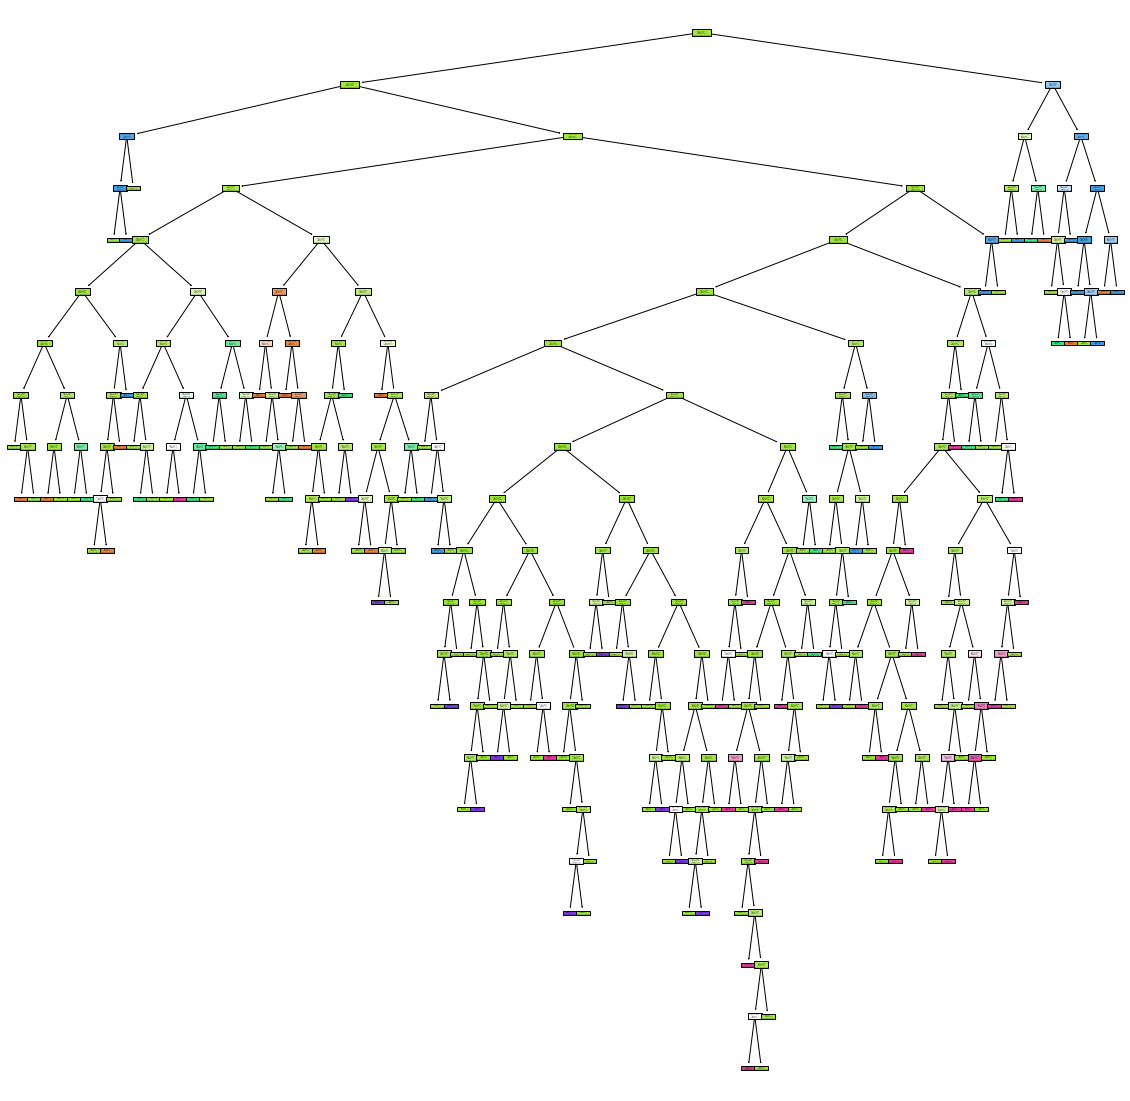

In [142]:
plt.figure(figsize=[20,20])
tree.plot_tree(dt_model, filled=True)

In [143]:
predictions=dt_model.predict(x_test)
confusion_matrix(y_test,predictions)

array([[  25,    5,    0,    0,    0,    0],
       [   3, 2869,    7,    4,    5,   15],
       [   1,    8,   16,    2,    0,    0],
       [   0,    5,    0,   19,    0,    0],
       [   0,    4,    0,    0,    0,    0],
       [   0,   11,    1,    0,    0,    0]], dtype=int64)

In [145]:
dt_model.score(x_test,y_test)

0.9763333333333334

In [146]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.99      0.99      0.99      2903
           2       0.67      0.59      0.63        27
           3       0.76      0.79      0.78        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        12

    accuracy                           0.98      3000
   macro avg       0.55      0.53      0.54      3000
weighted avg       0.98      0.98      0.98      3000



# 3. Random Forest

In [147]:
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Failure Type'], test_size=0.3, random_state=0)

In [148]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [149]:
predictions=rf_model.predict(x_test)
confusion_matrix(y_test,predictions)

array([[  24,    6,    0,    0,    0,    0],
       [   2, 2892,    4,    3,    0,    2],
       [   0,   14,   11,    2,    0,    0],
       [   0,    4,    0,   20,    0,    0],
       [   0,    4,    0,    0,    0,    0],
       [   0,   11,    1,    0,    0,    0]], dtype=int64)

In [150]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.99      1.00      0.99      2903
           2       0.69      0.41      0.51        27
           3       0.80      0.83      0.82        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        12

    accuracy                           0.98      3000
   macro avg       0.57      0.51      0.53      3000
weighted avg       0.98      0.98      0.98      3000



In [151]:
rf_model.score(x_train,y_train)

1.0

# 4. K-Nearest Neighbors

In [152]:
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Failure Type'], test_size=0.3, random_state=0)

In [153]:
knn=neighbors.KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [154]:
predictions=knn.predict(x_test)

In [155]:
confusion_matrix(y_test,predictions)

array([[   4,   26,    0,    0,    0,    0],
       [   6, 2893,    1,    3,    0,    0],
       [   0,   13,   14,    0,    0,    0],
       [   2,   18,    0,    4,    0,    0],
       [   0,    4,    0,    0,    0,    0],
       [   0,   12,    0,    0,    0,    0]], dtype=int64)

In [156]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.33      0.13      0.19        30
           1       0.98      1.00      0.99      2903
           2       0.93      0.52      0.67        27
           3       0.57      0.17      0.26        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        12

    accuracy                           0.97      3000
   macro avg       0.47      0.30      0.35      3000
weighted avg       0.96      0.97      0.96      3000



In [157]:
knn.score(x_train,y_train)

0.9748571428571429

# 5. Gaussian Naive Bayes

In [158]:
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Failure Type'], test_size=0.3, random_state=0)

In [159]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [160]:
predictions=gnb.predict(x_test)
confusion_matrix(y_test,predictions)

array([[  24,    6,    0,    0,    0,    0],
       [  46, 2807,   16,   34,    0,    0],
       [   1,    3,   23,    0,    0,    0],
       [   5,   10,    0,    9,    0,    0],
       [   0,    4,    0,    0,    0,    0],
       [   0,   11,    0,    1,    0,    0]], dtype=int64)

In [161]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.32      0.80      0.45        30
           1       0.99      0.97      0.98      2903
           2       0.59      0.85      0.70        27
           3       0.20      0.38      0.26        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        12

    accuracy                           0.95      3000
   macro avg       0.35      0.50      0.40      3000
weighted avg       0.97      0.95      0.96      3000



In [162]:
gnb.score(x_train,y_train)

0.9498571428571428

# 6. ADA Boost

In [163]:
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Failure Type'], test_size=0.3, random_state=0)

In [164]:
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)


AdaBoostClassifier()

In [165]:
predictions=adb.predict(x_test)

In [166]:
confusion_matrix(y_test,predictions)

array([[   0,   30,    0,    0,    0,    0],
       [   0, 2902,    0,    1,    0,    0],
       [   0,   24,    0,    3,    0,    0],
       [   0,   12,    0,   12,    0,    0],
       [   0,    4,    0,    0,    0,    0],
       [   0,   12,    0,    0,    0,    0]], dtype=int64)

In [167]:
report=classification_report(y_test,predictions)

In [168]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.97      1.00      0.99      2903
           2       0.00      0.00      0.00        27
           3       0.75      0.50      0.60        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        12

    accuracy                           0.97      3000
   macro avg       0.29      0.25      0.26      3000
weighted avg       0.95      0.97      0.96      3000



In [169]:
adb.score(x_train,y_train)

0.9677142857142857

# 7. Gradient Boost

In [170]:
x_train, x_test, y_train, y_test = train_test_split(pm_scaled.drop(['Failure Type','Target'],axis=1),
                                                    pm_scaled['Failure Type'], test_size=0.3, random_state=0)

In [177]:
gb=GradientBoostingClassifier(n_estimators=50,learning_rate=1,random_state=0)
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=50, random_state=0)

In [178]:
predictions=gb.predict(x_test)

In [179]:
confusion_matrix(y_test,predictions)

array([[  26,    4,    0,    0,    0,    0],
       [  58,  997,    0,  225, 1576,   47],
       [   2,    9,    0,   12,    0,    4],
       [   4,   12,    0,    7,    1,    0],
       [   0,    1,    0,    0,    3,    0],
       [   0,   10,    0,    1,    0,    1]], dtype=int64)

In [180]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.29      0.87      0.43        30
           1       0.97      0.34      0.51      2903
           2       0.00      0.00      0.00        27
           3       0.03      0.29      0.05        24
           4       0.00      0.75      0.00         4
           5       0.02      0.08      0.03        12

    accuracy                           0.34      3000
   macro avg       0.22      0.39      0.17      3000
weighted avg       0.94      0.34      0.50      3000



In [181]:
gb.score(x_train,y_train)

0.3505714285714286

# Conclusion
From the above machine learning models for dependent variable as "Failure Type", best performing models are Decision Tree,Random Forest with test accuracy of 98%

## 6. Final Report:
### Data Analysis and Treatment:
    (i) There are 10000 rows & 10 columns
    (ii) There are no missing values 
    (iii) There are two target variables: 'Target' and 'Failure Type'. 
    (iv) Data are highly imbalance. 
    (v) Target variable have six possible values: no failure, Heat Dissipation Failure, Power Failure, Overstrain Failure, Tool Wear Failure & Random Failures. 
    (vi) Rotational Speed is positively skewed. 
    (vii) There is high correlation between process temperature and air temperature, and between rotational speed and torque. 
    (viii) There is no multi- collinearity observed between variables. 
    (ix) Torque and rotational speed are highly correlated. 
    (x) Process temperature and air temperature are also highly correlated. 
    (xi) Failures occur for extreme values of some features, i.e., the machinery fails either for the lowest or largest values of torque and rotational speed. 
    (xii) Power failure happens both for lower and higher rotational speed/torque. It is the type of failure with the highest rotational speed (over 2500rpm) and lowest torque (below around 15Nm). 
    (xiii) Between torques 16Nm and 41Nm all failures are tool wear. 
    (xiv) Overstrain failures take place with torques ranging from around 47 and 68Nm) and rotational speeds from 1200 to 1500rpm approximately. 
    (xv) For heat dissipation failures, the failure is comparable to overstrain failures. 
    (xvi) Heat Dissipation Failure occurs for Air temperature range around 301.5 K to 303.8 K & Process Temperature range around 309.2 K to 311.8 K 
    (xvii) Overstrain Failure starts when Air temperature reaches around 296.8 K & Process temperature reaches around 307.2 K 
    (xviii) Around 3% data are outliers.

### Model Building Accuracy:
    (i) For dependent variable as "Target", best performing Machine Learning Models in terms of Accuracy Score are: Decision Tree, Random Forest, KNN, Gradient Boost with testing accuracy 98%. 
    (ii) For dependent variable as "Failure Type", best performing Machine Learning Models in terms of Accuracy Score are: Decision Tree, Random Forest with testing accuracy 98%.